# This is the extra explaining how the lifearea works

## The overview
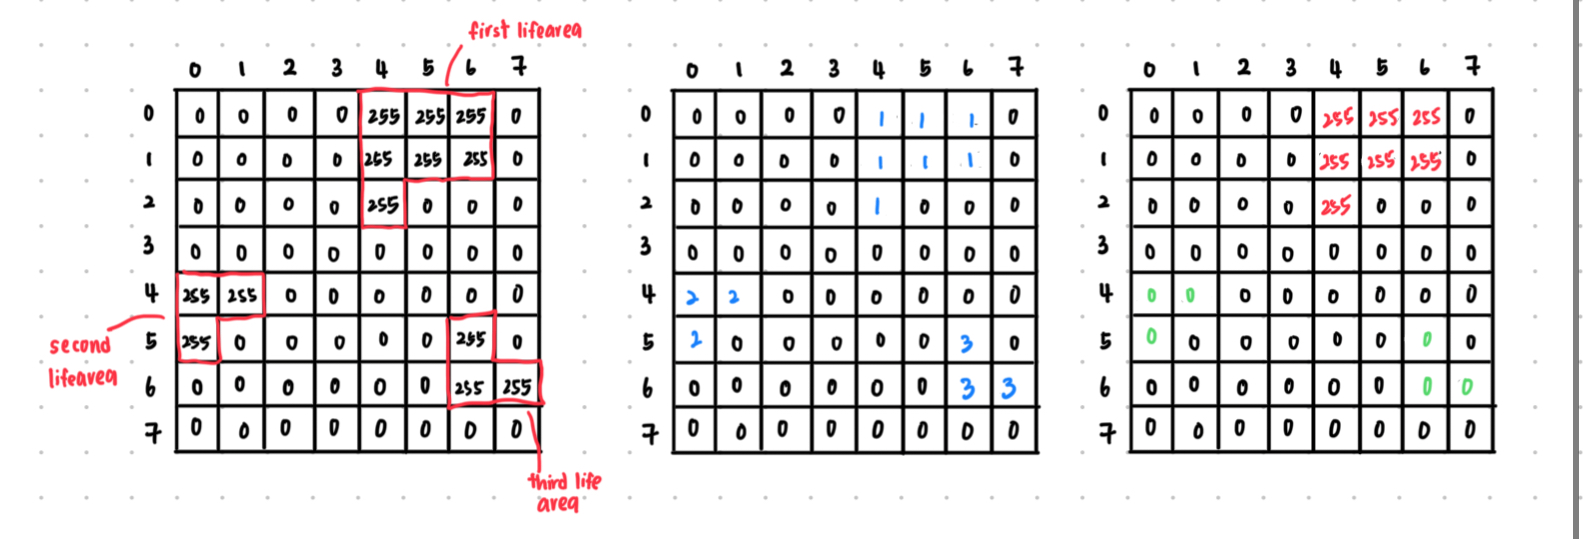

In [3]:
import cv2

# showing the bitmap of the picture
def showbitmap(row,col,bg,h,w):
    for y in range(row,row+h):
        print(str('{:0>2d}') .format(y)+":" ,end="")
        for x in range(col,col+w):
            print(bg[y][x],end=",")
        print()
    print() 
    
# using recursive to include all the lifearea
def area(row, col, lifearea):
    global nn
    if bg[row][col] != 255:
        return
    bg[row][col] = lifearea # this will be the number of that lifearea   
    if col>1: # left 
        if bg[row][col-1]==255:
            nn +=1
            area(row,col-1,lifearea)
    if col< w-1: # right
        if bg[row][col+1]==255:
            nn +=1
            area(row,col+1,lifearea)             
    if row>1: # up
        if bg[row-1][col]==255:
            nn+=1            
            area(row-1,col,lifearea)
    if row<h-1: # down
        if bg[row+1][col]==255:
            nn+=1            
            area(row+1,col,lifearea) 

# here we try using 7.jpg to work
image = cv2.imread('7.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
_,thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV) 
h=thresh.shape[0]
w=thresh.shape[1]

bg=thresh.copy()
showbitmap(0,0,bg,h,w)

# lifearea is the current lifearea (default is 0 -> no life)
lifearea=0 # total lifearea
nn=0       # the area of the current lifearea (the total 255 number of current lifearea)
life=[]    # store all the area in the picture

# loop through every region of the picture
for row in range(0,h):
   for col in range(0,w):
      if bg[row][col] == 255:
         nn = 1  
         lifearea = lifearea + 1 
         area(row,col,lifearea)  
         life.append(nn)

print("lifearea=",lifearea) 
print(life)                 
maxlife=max(life)          
indexmaxlife=life.index(maxlife) 
showbitmap(0,0,bg,h,w)  
 
# change all the area except the max lifearea to be 0 (which we exclude other lifearea only pick the biggest lifearea)
for row in range(0,h):
   for col in range(0,w):
      if bg[row][col] == indexmaxlife+1:
          bg[row][col]=255
      else:
          bg[row][col]=0
            
showbitmap(0,0,bg,h,w)  
_,bg = cv2.threshold(bg, 127, 255, cv2.THRESH_BINARY_INV)   
cv2.imwrite('area.jpg', bg)  

cv2.imshow('Frame', thresh) 
cv2.moveWindow("Frame",500,450) 
cv2.imshow('bg', bg)  
cv2.moveWindow("bg",500,550) 
key = cv2.waitKey(0)
cv2.destroyAllWindows()

00:255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0,
01:255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
02:255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
03:255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
04:0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
05:0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
06:0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,
07:0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,
08:0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,
09:0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,
10:0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,
11:0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,0,
12:0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,0,
13:0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,
14:0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,
15:0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,
16:0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255